In [68]:
import yfinance as yf

In [6]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [9]:
stock = "GOOG"
google_data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [11]:
google_data.shape

(5035, 6)

In [12]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,46.946966,47.440374,46.477757,46.965746,46.855498,1.135789e+08
std,44.881634,45.372574,44.441224,44.907493,44.810551,1.488791e+08
min,3.596519,3.710841,3.476967,3.499134,3.490562,1.584340e+05
25%,13.182589,13.330783,13.054444,13.188940,13.156629,2.684000e+07
50%,27.599226,27.776884,27.324980,27.592745,27.525146,5.278400e+07
75%,61.849499,62.351751,61.318150,61.902750,61.751101,1.379692e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [13]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2004-10-19 to 2024-10-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5035 non-null   float64
 1   High       5035 non-null   float64
 2   Low        5035 non-null   float64
 3   Close      5035 non-null   float64
 4   Adj Close  5035 non-null   float64
 5   Volume     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [14]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

NameError: name 'google_data' is not defined

<Figure size 1500x500 with 0 Axes>

In [3]:
def plot_graph(figsize,values,column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [4]:
google_data.columns

NameError: name 'google_data' is not defined

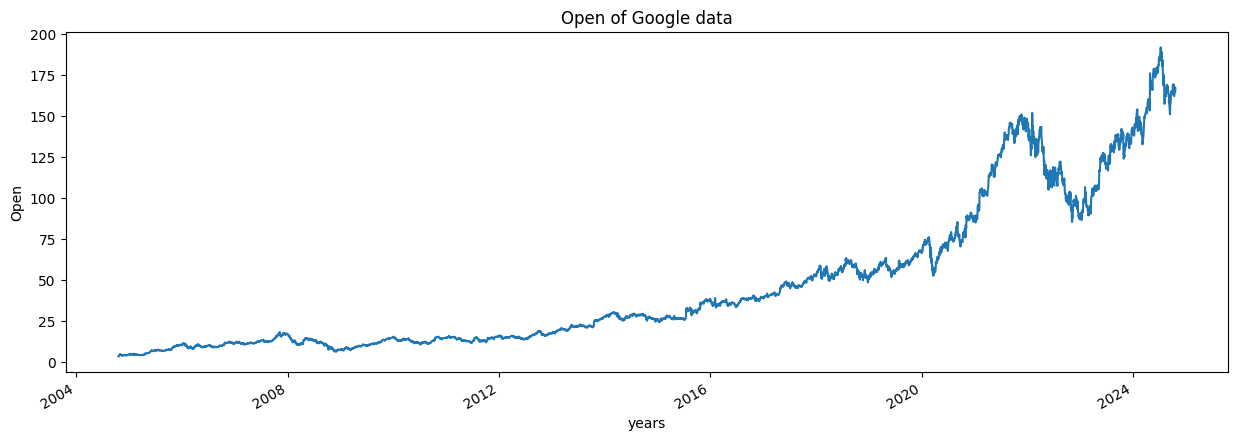

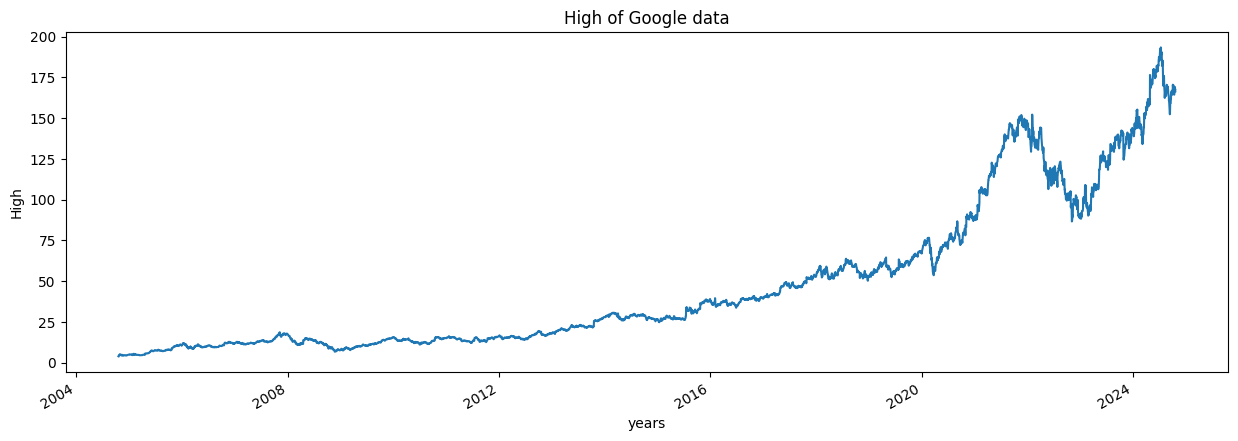

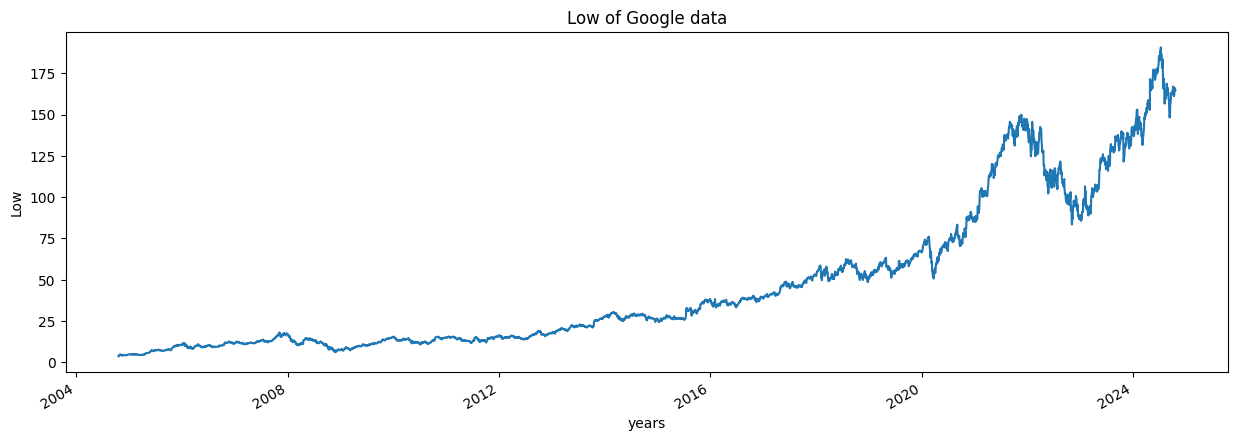

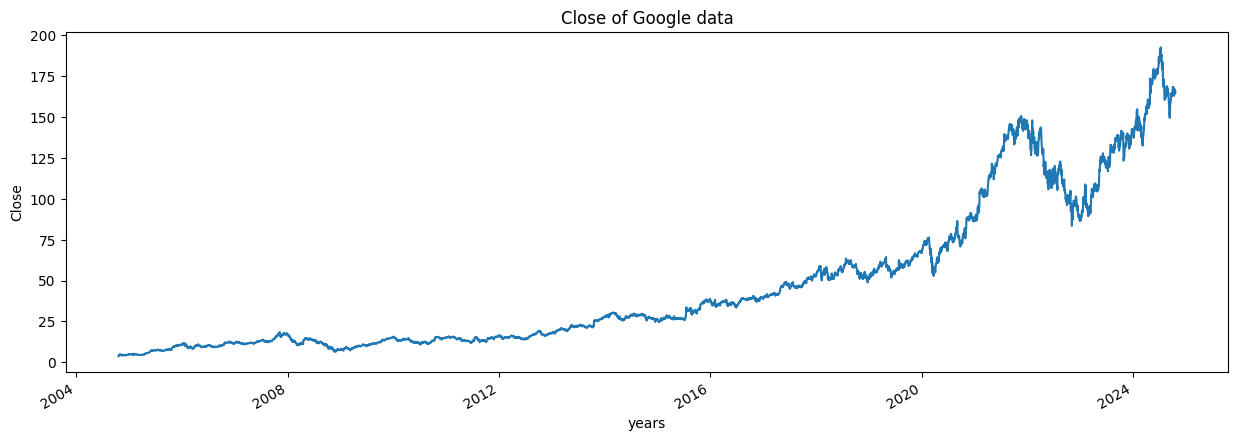

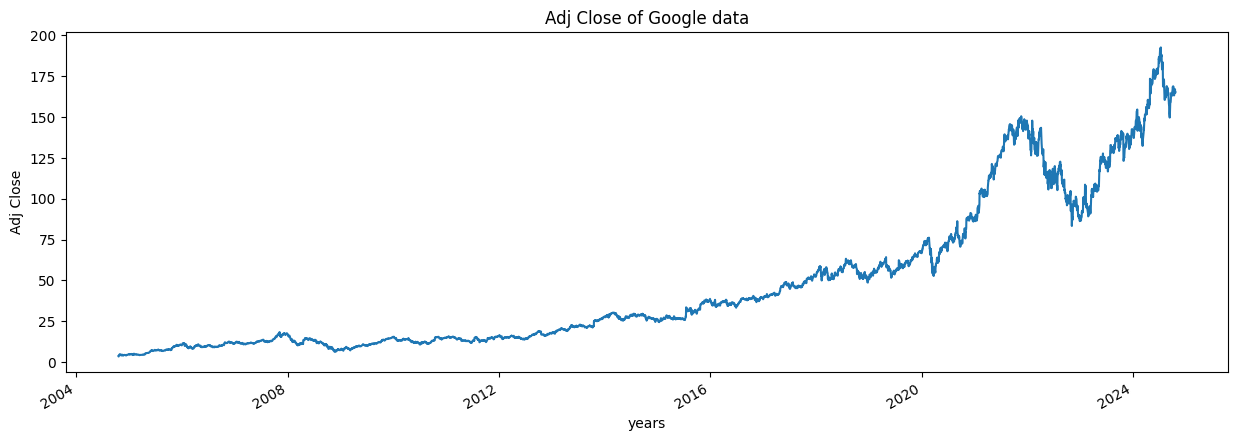

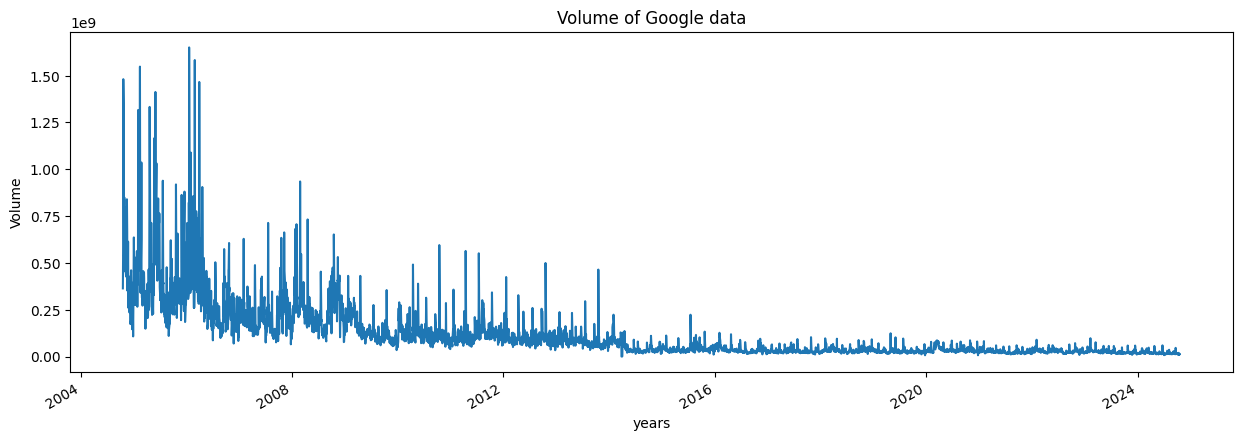

In [27]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

In [28]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [29]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [30]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [31]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 52
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 202


In [33]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [34]:
google_data['MA_for_250_days'][0:250].tail()


Date
2005-10-07         NaN
2005-10-10         NaN
2005-10-11         NaN
2005-10-12         NaN
2005-10-13    5.774179
Name: MA_for_250_days, dtype: float64

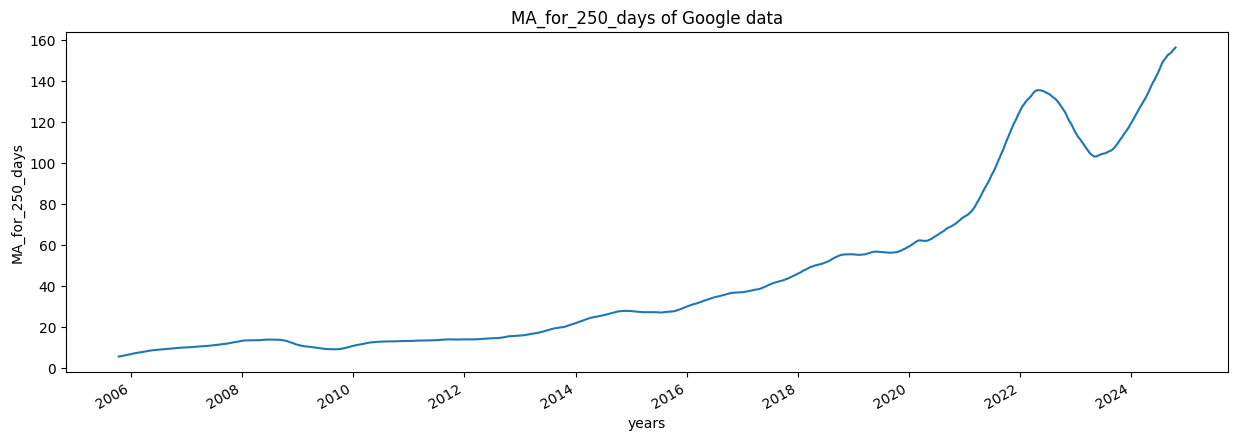

In [35]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

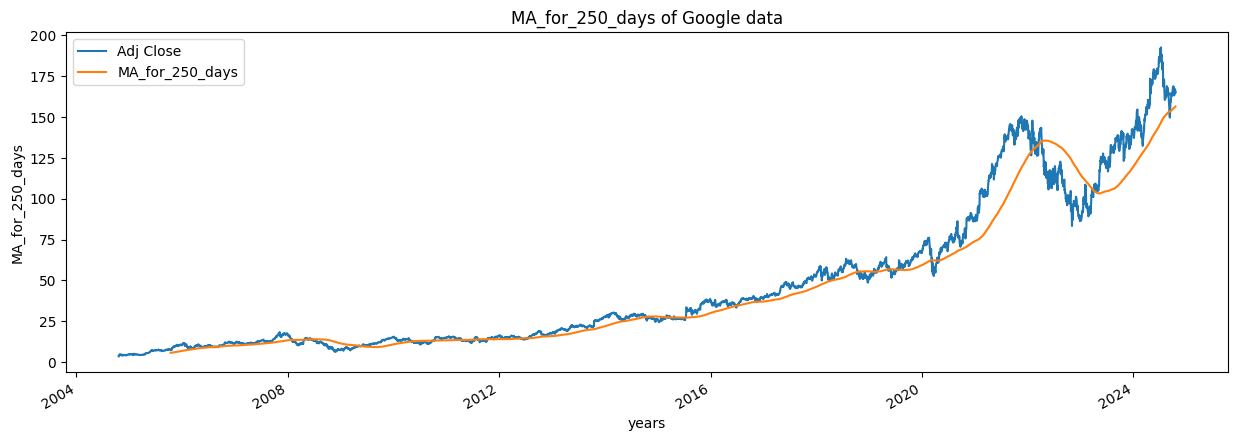

In [36]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

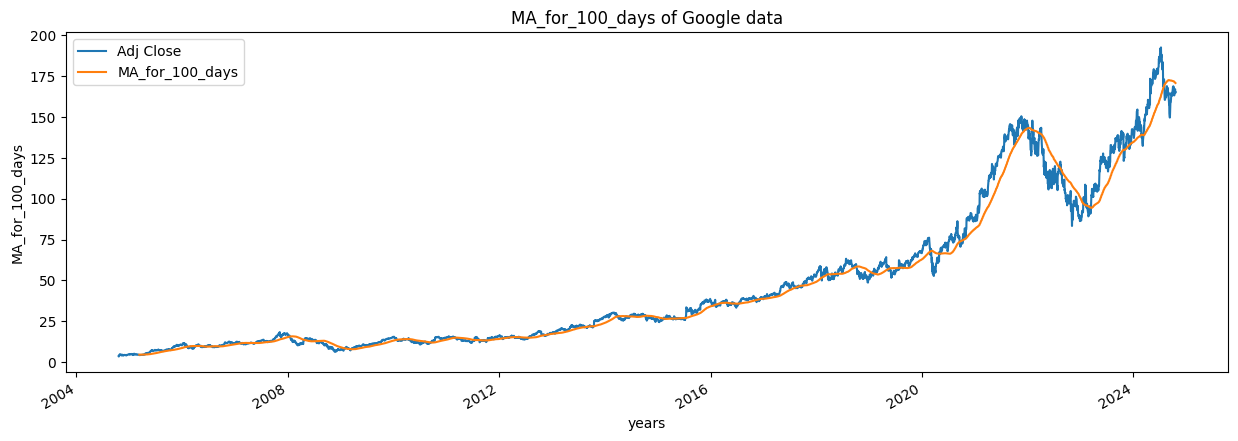

In [37]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

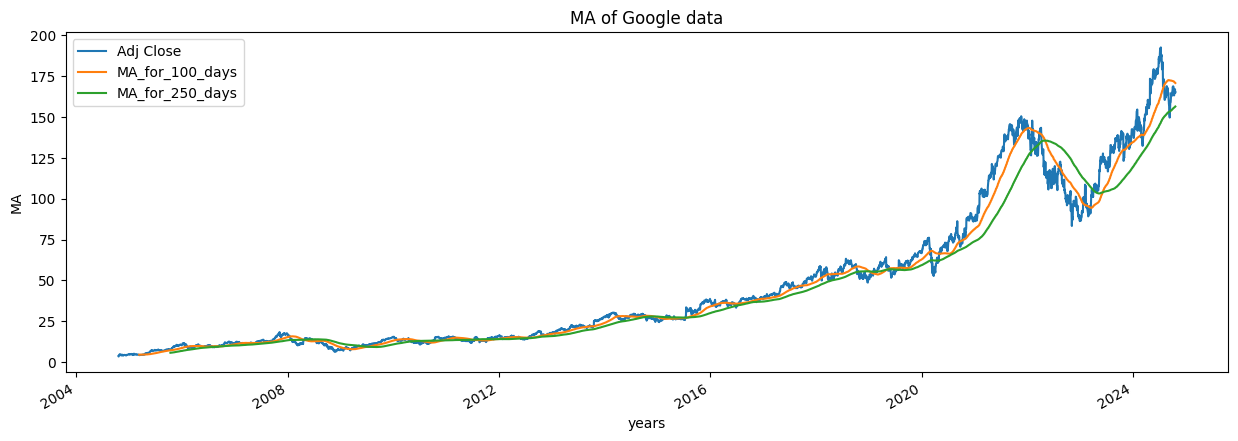

In [38]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [39]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-10-19,3.675662,NaN
2004-10-20,3.490562,-0.050358
2004-10-21,3.711439,0.063278
2004-10-22,4.284132,0.154305
2004-10-25,4.656070,0.086818


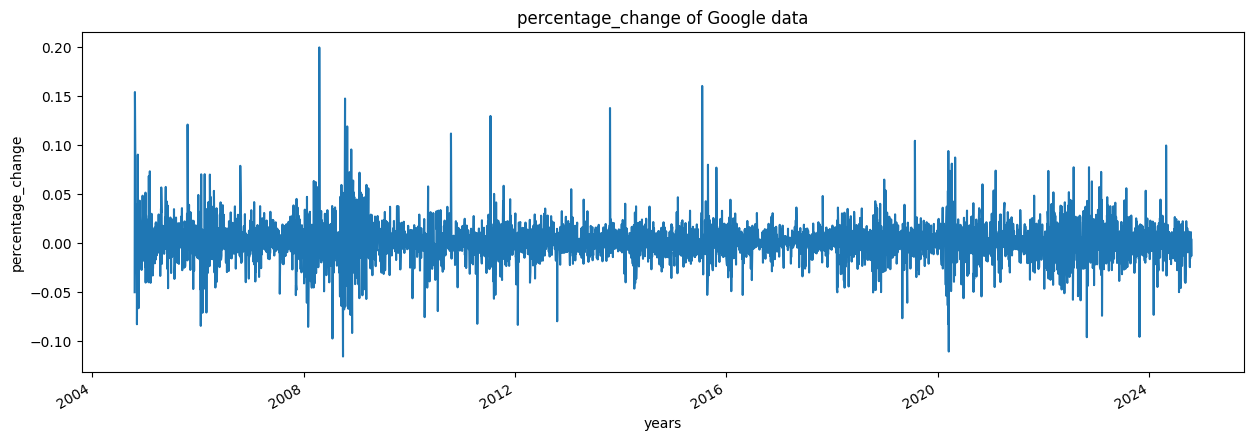

In [40]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [41]:
Adj_close_price = google_data[['Adj Close']]

In [42]:
max(Adj_close_price.values),min(Adj_close_price.values) 


(array([192.40672302]), array([3.49056196]))

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.0009798 ],
       [0.        ],
       [0.00116918],
       ...,
       [0.86413699],
       [0.85233276],
       [0.85519121]])

In [44]:
len(scaled_data)

5035

In [45]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [46]:
x_data[0],y_data[0]

(array([[0.0009798 ],
        [0.        ],
        [0.00116918],
        [0.00420065],
        [0.00616945],
        [0.00543295],
        [0.00598138],
        [0.0069454 ],
        [0.00659556],
        [0.00730443],
        [0.00715188],
        [0.00673102],
        [0.00581435],
        [0.00379557],
        [0.00421642],
        [0.00371009],
        [0.00359961],
        [0.00559341],
        [0.00545926],
        [0.00583671],
        [0.00421511],
        [0.00420985],
        [0.00355753],
        [0.00380215],
        [0.00323663],
        [0.0035549 ],
        [0.00450708],
        [0.005116  ],
        [0.00533432],
        [0.00545663],
        [0.00519097],
        [0.00511732],
        [0.00524883],
        [0.00470829],
        [0.00406913],
        [0.00387843],
        [0.00433216],
        [0.00409806],
        [0.00394024],
        [0.00502394],
        [0.00516729],
        [0.00473197],
        [0.00520674],
        [0.00585644],
        [0.00568941],
        [0

In [47]:
int(len(x_data)*0.7)

3454

In [48]:
4908-100-int(len(x_data)*0.7)

1354

In [49]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3454, 100, 1)
(3454, 1)
(1481, 100, 1)
(1481, 1)


In [53]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [54]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [56]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 56s 16ms/step - loss: 2.2747e-04
Epoch 2/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 54s 16ms/step - loss: 1.2431e-04


In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [58]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [59]:
predictions

array([[0.26769236],
       [0.27181342],
       [0.2740527 ],
       ...,
       [0.8467282 ],
       [0.8482648 ],
       [0.84194237]], dtype=float32)

In [60]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 54.061977],
       [ 54.84051 ],
       [ 55.26355 ],
       ...,
       [163.4512  ],
       [163.7415  ],
       [162.54709 ]], dtype=float32)

In [61]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 54.28169632],
       [ 54.58744431],
       [ 55.18597031],
       ...,
       [166.74000549],
       [164.50999451],
       [165.05000305]])

In [62]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [63]:
rmse

2.734708181131518

In [64]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-11-29,54.281696,54.061977
2018-11-30,54.587444,54.840511
2018-12-03,55.185970,55.263550
2018-12-04,52.412285,55.624065
2018-12-06,53.305592,54.474052


<Figure size 640x480 with 0 Axes>

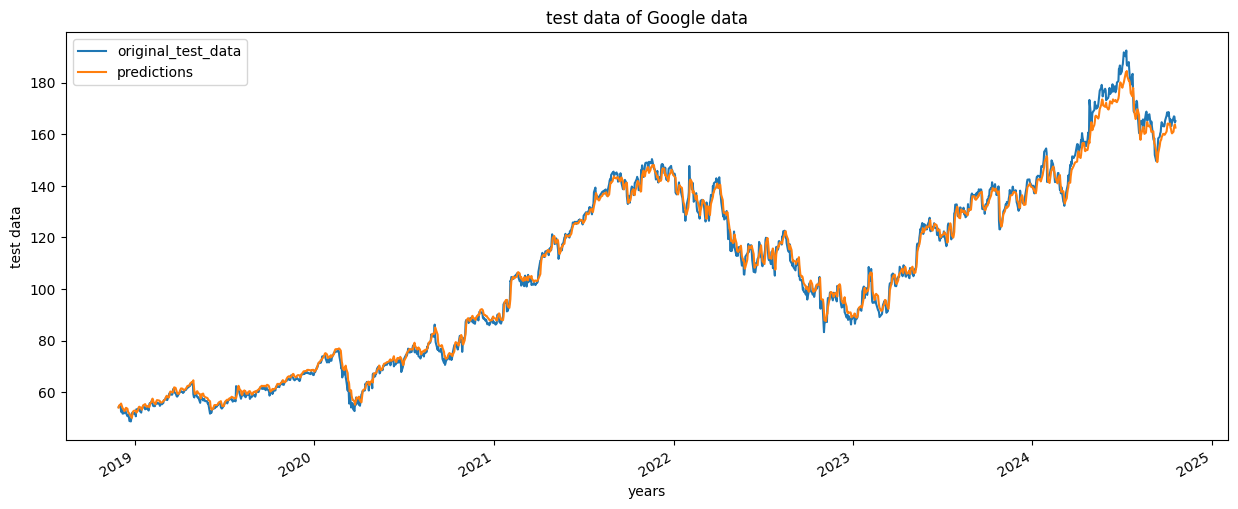

In [65]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

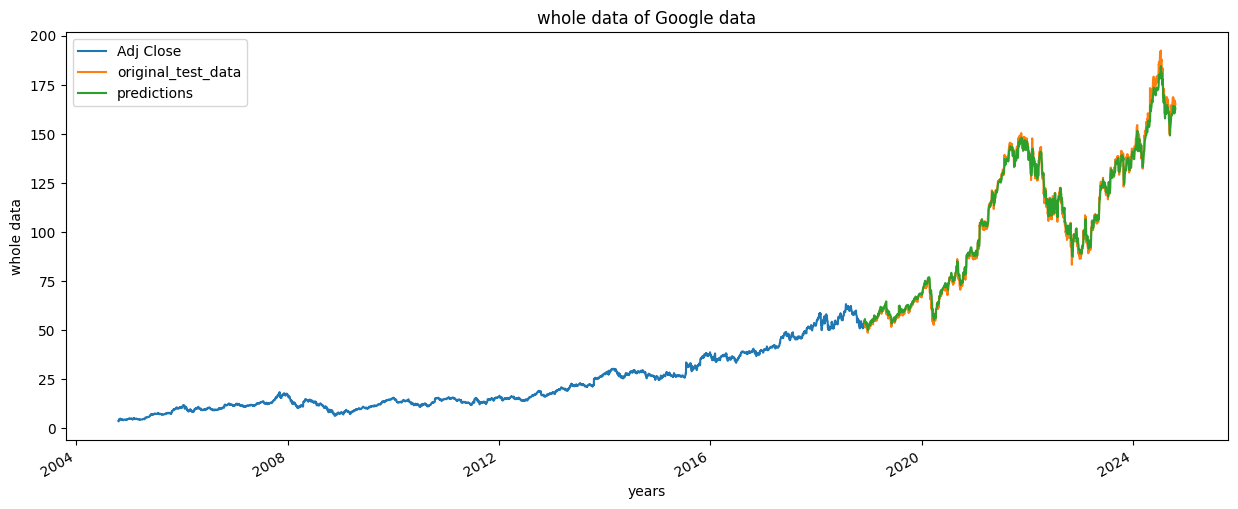

In [66]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [67]:
model.save("Latest_stock_price_model.keras")